# COGS 108 - Final Project 

# Overview

My project tries to determine if there is a discrepency in the yelp reviews given to parks depending on the average household income(AHI) of the city in San Diego County. Determining this will allow the county to see if certain cities that have a low average household income lack good (highly rated) parks and rec centers. This could also hint towards a general lack of resources provided to low income neighborhoods that could potentially tie into the reasoning behind the low average income. My results show that there is a slight coorelation between AHI, and parks and rec ratings. Higher AHI cities tend to have higher rated parks, while lower AHI cities have lower rated parks.  

# Name & GitHub ID

- Name: Jota Yamaguchi
- GitHub Username: jyamaguc

# Research Question

Is there a correlation between the average household income and average yelp review of parks given from a city in the San Diego County?

## Background and Prior Work

San Diego County, to no suprise, is very diverse. It has great schools, a beautiful beach atmosphere, while also being right on the boarder to mexico. To summerize, people from all different parts of the world come here for all sorts of reasons. But this also creates a discrepency in neighborhoods throughout the county. Some neighborhoods are too expensive for even the average person to afford, while other neighborhoods are for those that are barely keeping their head above the water(1). Along with the discrepency in income of neighborhoods comes the discrepency of resources provided to those nieghborhoods. As you can assume, rich neighborhoods have the nicest parks, schools, police response times, etc. While low income neighborhoods may not have the same resources and/or of that quality. 

In San Diego, there is a high ammount of low income neighborhoods that also lack the resources (2). Being able to find the cause of these dicrepencies may help improve the overall quality of these neighborhoods. To begin with, something as basic as public parks can help to show the discrepency. While people in high income neighborhoods do not think twice about taking a walk to the park, people in low income neighborhoods may have doubts about safety or overall quality of the park.   


References (include links):
- 1) https://www.frbsf.org/community-development/files/E_Hopkins.pdf
- 2)http://www.nusinstitute.org/assets/resources/pageResources/NUSIPR_Concentrated_Poverty_Brief.pdf

# Hypothesis


My hypothesis is that higher income cities will have higher rated parks, while lower income cities will have lower rated parks. This is due to the fact that low income cities lack the resources that are provided to high income cities.

# Dataset(s)

##### Park Information
- Link : yelp_SD_parks.csv
- Number of Observations : 834
- This dataset includes the park name, its address, park id, web url, the rating, the number of reviews, longitude and latitude, and if it is closed or not. 
- I am only interested in the park name, the city it is in, the rating, and the number of ratings.
- I will be using this dataset to help me find the average rating of parks in a city in San Diego County.

#### 2016 San Diego County Demographics - Number of Households by Household Income, by City
- Link : https://data.sandiegocounty.gov/Demographics/2016-San-Diego-County-Demographics-Number-of-House/cr22-d523
- Number of Observations : 18
- This dataset provides the number of people and the percent of people that fit within a a certain range of household income per city.
- Since each range of income is a catagory, I will be using mode as a measure of central tendency.
- I will be combining this dataset with the Park Information dataset based on the city.


# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

In [2]:
df_park = pd.read_csv(r"C:\Users\tyama\Documents\GitHub\individual_fa20\data\yelp_SD_parks.csv")
df_income = pd.read_csv(r"C:\Users\tyama\Documents\GitHub\individual_fa20\data\ave_household_income_csv.csv")



# Data Cleaning

Describe your data cleaning steps here.

In [3]:
#Strip the addresses of the parks of everything except for the city. 
#Only interested in cities that are included in df_income
def city(address):
    address = address.lower()
    address = address.strip()
    if 'carlsbad' in address:
        output = 'Carlsbad'
    elif 'chula vista' in address:
        output = 'Chula Vista'
    elif 'coronado' in address:
        output = 'Coronado'
    elif 'del mar' in address:
        output = 'Del Mar'
    elif 'el cajon' in address:
        output = 'El Cajon'
    elif 'encinitas' in address:
        output = 'Encinitas'
    elif 'escondido' in address:
        output = 'Escondido'
    elif 'imperial beach' in address:
        output = 'Imperial Beach'
    elif 'la mesa' in address:
        output = "La Mesa"
    elif 'lemon grove' in address:
        output = 'Lemon Grove'
    elif 'national city' in address:
        output = 'National City'
    elif 'oceanside' in address:
        output = 'Oceanside'
    elif 'poway' in address:
        output = 'Poway'
    elif 'san diego' in address:
        output = 'San Diego'
    elif 'san marcos' in address:
        output = 'San Marcos'
    elif 'santee' in address:
        output = 'Santee'
    elif 'solana beach' in address:
        output = 'Solana Beach'
    elif 'vista' in address:
        output = 'Vista'
    else:
        output = np.nan
    return output

    

            

In [4]:
df_park['address'] = df_park['address'].apply(city)


In [5]:
#remove parks with less than 10 reviews
#not enough reviews to be a reliable stat
df_park = df_park[(df_park['review_count'] >= 10)]
df_park.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,San Diego,1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,San Diego,NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,San Diego,1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,San Diego,NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,Coronado,NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [6]:
#remove columns 'phone', 'id', 'url', 'longitude', 'latitude', and 'is_closed'
#not relevant 
df_park.drop(['phone', 'id', 'url', 'longitude', 'latitude', 'is_closed'], axis = 1, inplace = True)


In [7]:
#clean up column names
df_park.rename(columns = {'name' : 'Park Name', 'address' : "City", 'rating' :'Rating', 'review_count' : 'Review Count'}, inplace = True)
df_park.head()

,Park Name,City,Rating,Review Count
0,Balboa Park,San Diego,5.0,2105
1,Civita Park,San Diego,4.5,46
2,Waterfront Park,San Diego,4.5,242
3,Trolley Barn Park,San Diego,4.5,102
4,Bay View Park,Coronado,5.0,42


In [8]:
#drop NaN values
df_park = df_park.dropna()

In [9]:
#clean up city names
df_income['city']=df_income['city'].apply(city)
df_income

,city,num_under_35k,percent_under_35k,num_35k-50k,percent_35k-50k,num_50k-75k,percent_50k-75k,num_75k-100k,percent_75k-100k,num_100k-150k,percent_100k-150k,num_greaterthan_150k,percent_higherthan_150k
0,Carlsbad,"7,398",17.2,"3,497",8.1,"5,639",13.1,"5,342",12.4,"8,588",20.0,"12,462",29.0
1,Chula Vista,"20,658",26.6,"8,962",11.5,"13,203",17.0,"11,730",15.1,"14,085",18.1,"9,166",11.8
2,Coronado,"1,602",17.8,829,9.2,"1,441",16.0,957,10.6,"1,669",18.6,"2,488",27.7
3,Del Mar,462,20.5,48,2.1,225,10.0,233,10.3,431,19.1,859,38.0
4,El Cajon,"13,188",40.0,"4,142",12.6,"5,730",17.4,"3,843",11.7,"3,822",11.6,"2,212",6.7
5,Encinitas,"4,510",19.0,"1,483",6.3,"3,135",13.2,"2,636",11.1,"4,579",19.3,"7,352",31.0
6,Escondido,"14,900",33.0,"6,066",13.4,"8,379",18.5,"5,275",11.7,"6,031",13.3,"4,566",10.1
7,Imperial Beach,"3,048",33.7,"1,716",19.0,"1,719",19.0,"1,223",13.5,885,9.8,453,5.0
8,La Mesa,"6,777",28.5,"3,329",14.0,"4,638",19.5,"3,630",15.3,"3,535",14.9,"1,858",7.8
9,Lemon Grove,"2,469",29.2,"1,311",15.5,"1,676",19.8,"1,206",14.2,"1,338",15.8,465,5.5


In [10]:
#drop irrelevant rows
#only need percentage 
df_income.drop(columns = ['num_under_35k', 'num_35k-50k', 'num_50k-75k', 'num_75k-100k', 'num_100k-150k', 'num_greaterthan_150k'], inplace = True)
df_income.head()

,city,percent_under_35k,percent_35k-50k,percent_50k-75k,percent_75k-100k,percent_100k-150k,percent_higherthan_150k
0,Carlsbad,17.2,8.1,13.1,12.4,20.0,29.0
1,Chula Vista,26.6,11.5,17.0,15.1,18.1,11.8
2,Coronado,17.8,9.2,16.0,10.6,18.6,27.7
3,Del Mar,20.5,2.1,10.0,10.3,19.1,38.0
4,El Cajon,40.0,12.6,17.4,11.7,11.6,6.7


In [11]:
#celan up column names
df_income.rename(columns = {'city' :'City', 'percent_under_35k': '% Under 35k ','percent_35k-50k': '% 35k to 50k', 'percent_50k-75k' : '% 50k to 75k', 'percent_75k-100k' : '% 75k to 100k', 'percent_100k-150k' : '% 100k to 150k', 'percent_higherthan_150k' : '% 150k+'}, inplace = True)
df_income.head()

,City,% Under 35k,% 35k to 50k,% 50k to 75k,% 75k to 100k,% 100k to 150k,% 150k+
0,Carlsbad,17.2,8.1,13.1,12.4,20.0,29.0
1,Chula Vista,26.6,11.5,17.0,15.1,18.1,11.8
2,Coronado,17.8,9.2,16.0,10.6,18.6,27.7
3,Del Mar,20.5,2.1,10.0,10.3,19.1,38.0
4,El Cajon,40.0,12.6,17.4,11.7,11.6,6.7


In [12]:
# find the mode for each city
#Carlsbad = 150k+ 
#Chula Vista = Under 35k
#Coronado = 150k+
#Del Mar = 150k+
#El Cajon = under 35k
#Encinitas = 150k+
#Imperial Beach = under 35k
#La Mesa = under 35k
#Lemon Grove = under 35k
#National City = under 35k
#Oceanside = under 35k
#Poway = 150k+
#San Diego = under 35k
#San Marcos = under 35k
#Santee = 100 to 150k
#Solana Beach = 150k+
#Vista = under35k

In [13]:
#Convert new data into a dataframe
df_ave = pd.DataFrame({'City': ['Carlsbad', 'Chula Vista', 'Coronado', 'Del Mar', 'El Cajon', 'Encinitas', 'Imperial Beach', 'La Mesa', 'Lemon Grove', 'National City', 'Oceanside','Poway','San Diego','San Marcos','Santee','Solana Beach','Vista'], 'Income' :['150k+','Under 35k','150k+','150k+','under 35k','150k+','under 35k','under 35k','under 35k','under 35k','under 35k','150k+',
'under 35k','under 35k','100 to 150k','150k+','under 35k']})

In [14]:
#merge the two dataframes to make one df
df = pd.merge(df_ave, df_park, on ='City')

df.head()

,City,Income,Park Name,Rating,Review Count
0,Carlsbad,150k+,Windsor at Aviara,3.5,75
1,Carlsbad,150k+,"Curtis Management Company, Inc",2.0,50
2,Carlsbad,150k+,Leo Carrillo Ranch Historic Park,4.5,107
3,Carlsbad,150k+,Newman Windows & Doors,3.5,116
4,Carlsbad,150k+,La Costa Canyon Park,4.0,16


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [41]:
#create a dataframe for each city and its parks
carlsbad = df[(df['City'] == 'Carlsbad')]
cv = df[(df['City'] == 'Chula Vista')]
coro = df[(df['City'] == 'Coronado')]
delmar = df[(df['City'] == 'Del Mar')]
elcajon = df[(df['City'] == 'El Cajon')]
enci = df[(df['City'] =='Encinitas' )]
esco = df[(df['City'] =='Escondido' )]
ib = df[(df['City'] =='Imperial Beach' )]
lamesa = df[(df['City'] =='la Mesa' )]
lg = df[(df['City'] =='Lemon Grove' )]
nc = df[(df['City'] =='National City' )]
ocean = df[(df['City'] == 'Oceanside' )]
poway = df[(df['City'] =='Poway' )]
sd = df[(df['City'] =='San Diego' )]
sm = df[(df['City'] =='San Marcos' )]
santee = df[(df['City'] =='Santee' )]
solana = df[(df['City'] =='Solana Beach' )]
vista = df[(df['City'] =='Vista' )]




,City,Income,Park Name,Rating,Review Count
470,Santee,100 to 150k,Old Mission Dam Trail,4.0,11
471,Santee,100 to 150k,Oak Canyon Trail,4.5,13
472,Santee,100 to 150k,Big Rock Park,4.5,31
473,Santee,100 to 150k,Santee Lakes Recreation Preserve,3.5,246
474,Santee,100 to 150k,Mast Park,3.5,36
475,Santee,100 to 150k,Creation and Earth History Museum,3.5,88
476,Santee,100 to 150k,Town Center Community Park,4.5,16


### Visuals of ratings of parks in each city in  San Diego County

Text(0.5, 1.0, 'Carlsbad - 150k')

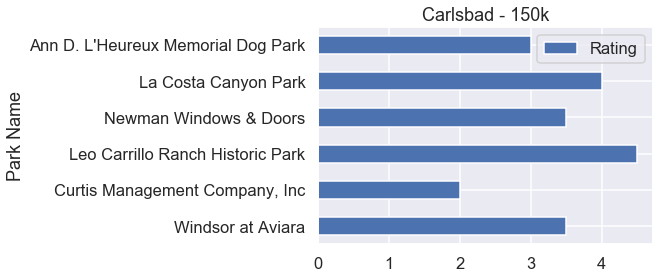

In [16]:
#Carlsbad
carlsbad.plot.barh(x = 'Park Name', y = "Rating")
plt.title("Carlsbad - 150k")


Text(0.5, 1.0, 'Chula Vista - Under 35k')

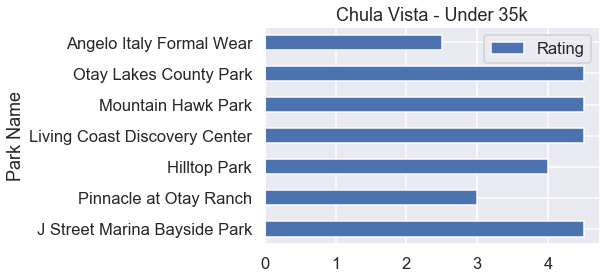

In [17]:
#Chula Vista
cv.plot.barh(x = 'Park Name', y = "Rating")
plt.title('Chula Vista - Under 35k'  )

Text(0.5, 1.0, 'Coronado - 150k+')

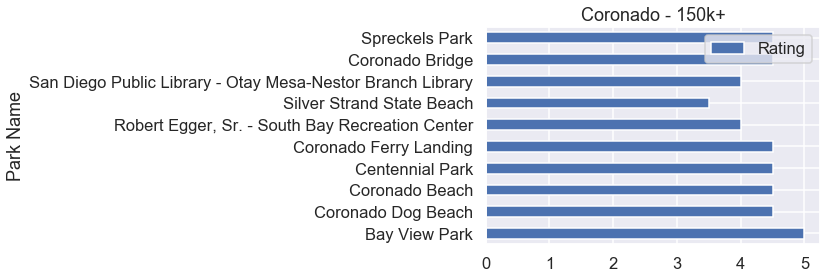

In [18]:
#coronado
coro.plot.barh(x = 'Park Name', y = "Rating")
plt.title('Coronado - 150k+')

Text(0.5, 1.0, 'Del Mar - 150k+')

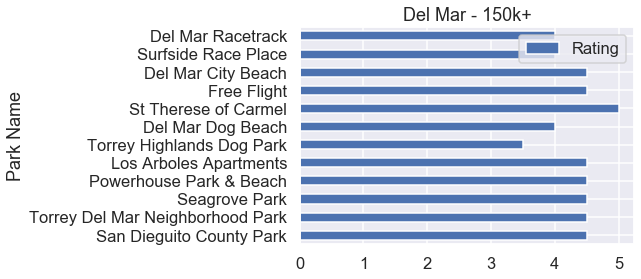

In [19]:
#Del Mar
delmar.plot.barh(x = 'Park Name', y = "Rating")
plt.title('Del Mar - 150k+')

Text(0.5, 1.0, 'El Cajon - under 35k')

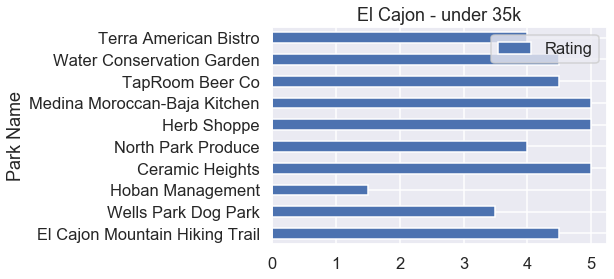

In [20]:
#El Cajon
elcajon.plot.barh(x = 'Park Name', y = "Rating")
plt.title('El Cajon - under 35k')

Text(0.5, 1.0, 'Encinitas - 150k+')

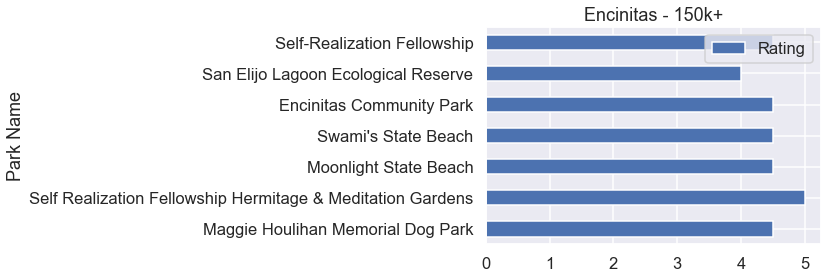

In [21]:
#Encinitas
enci.plot.barh(x = 'Park Name', y = "Rating")
plt.title('Encinitas - 150k+')

Text(0.5, 1.0, 'Imperial Beach - under 35k')

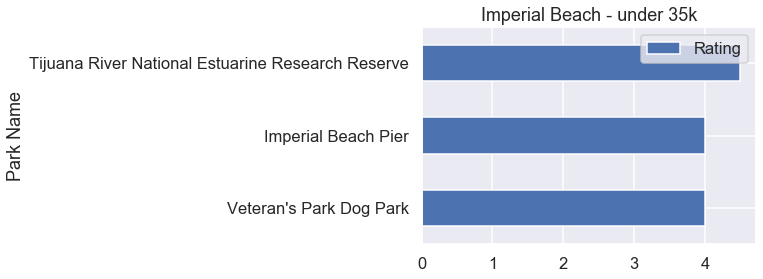

In [22]:
#Imperial Beach
ib.plot.barh(x = 'Park Name', y = "Rating")
plt.title('Imperial Beach - under 35k')

In [23]:
#La mesa
#no parks listed from La mesa

Text(0.5, 1.0, 'Lemon Grove - under 35k')

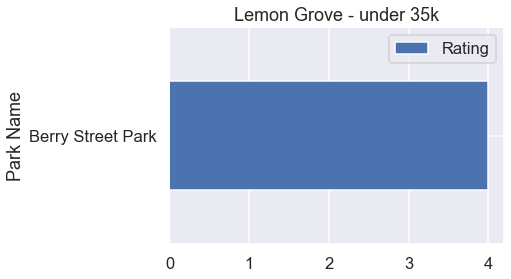

In [24]:
#lemon Grove
lg.plot.barh(x = 'Park Name', y = "Rating")
plt.title('Lemon Grove - under 35k')

Text(0.5, 1.0, 'National City - under 35k')

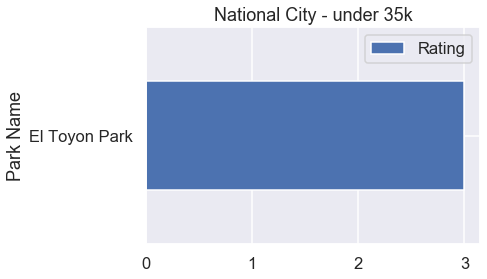

In [25]:
#National City
nc.plot.barh(x = 'Park Name', y = "Rating")
plt.title('National City - under 35k')

Text(0.5, 1.0, 'Oceanside - under 35k')

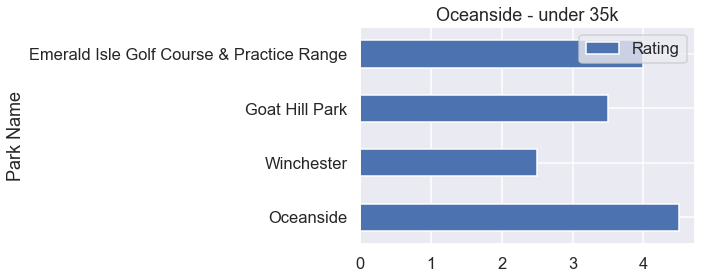

In [26]:
#Oceanside
ocean.plot.barh(x = 'Park Name', y = "Rating")
plt.title('Oceanside - under 35k')

Text(0.5, 1.0, 'Poway - 150k+')

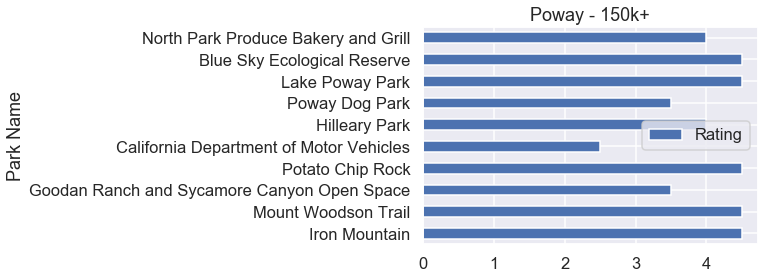

In [27]:
#Poway
poway.plot.barh(x = 'Park Name', y = "Rating")
plt.title('Poway - 150k+')

In [31]:
#San Diego 
#mean of rating due to the amount of parks
print('Average rating is ' + str(sd['Rating'].mean()) + ' while the income mode is less than 35k. ')


Average rating is 3.9728682170542635 while the income mode is less than 35k. 


Text(0.5, 1.0, 'San Marcos - under 35k')

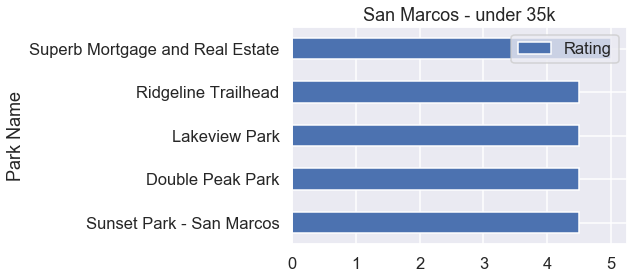

In [32]:
#San Marcos
sm.plot.barh(x = 'Park Name', y = "Rating")
plt.title('San Marcos - under 35k')

Text(0.5, 1.0, 'Santee - 100 to 150k')

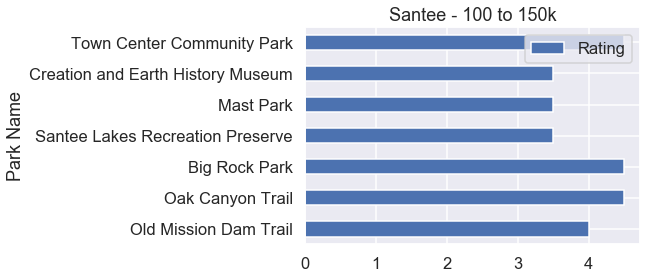

In [33]:
#Santee
santee.plot.barh(x = 'Park Name', y = "Rating")
plt.title('Santee - 100 to 150k')

Text(0.5, 1.0, 'Solana Beach - 150k+')

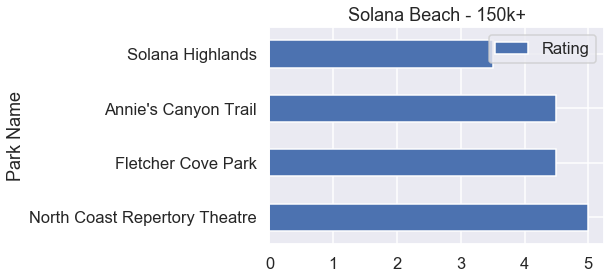

In [34]:
#Solana Beach
solana.plot.barh(x = 'Park Name', y = "Rating")
plt.title('Solana Beach - 150k+')

Text(0.5, 1.0, 'Vista - under 35k')

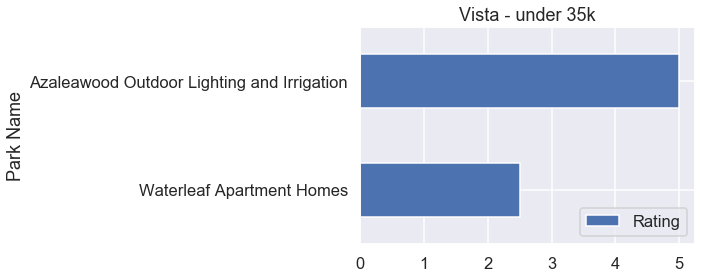

In [35]:
#Vista
vista.plot.barh(x = 'Park Name', y = "Rating")
plt.title('Vista - under 35k')

### Mathematically visualize the rating of a park depending on mode household income of the city

In [43]:

df_under35 = df[(df['Income'] == 'under 35k')]
df_150 = df[(df['Income'] == '150k+')]
df_santee = df[(df['Income'] == '100 to 150k')]


,City,Income,Park Name,Rating,Review Count
470,Santee,100 to 150k,Old Mission Dam Trail,4.0,11
471,Santee,100 to 150k,Oak Canyon Trail,4.5,13
472,Santee,100 to 150k,Big Rock Park,4.5,31
473,Santee,100 to 150k,Santee Lakes Recreation Preserve,3.5,246
474,Santee,100 to 150k,Mast Park,3.5,36
475,Santee,100 to 150k,Creation and Earth History Museum,3.5,88
476,Santee,100 to 150k,Town Center Community Park,4.5,16


In [59]:
x = df_under35['Rating'].mean()
y = df_santee['Rating'].mean()
z = df_150['Rating'].mean()



In [60]:
df_result = pd.DataFrame({"Income" : ['Under 35k', '100 to 150k', '150k+'], 'Average Rating' : [x , y , z]})
df_result

,Income,Average Rating
0,Under 35k,3.980952
1,100 to 150k,4.000000
2,150k+,4.183673


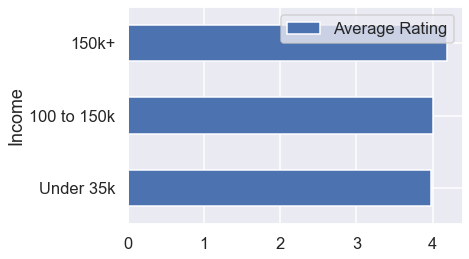

In [61]:
df_result.plot.barh(x = 'Income', y = 'Average Rating')

# Ethics & Privacy

The dataset that are used do a good job of maintaining the privacy of the individual who the observation was taken from. For example, the dataset regarding income has no way of identifying who has a certain income. Similarly, the dataset with the parks have no way of tying the rating to the individual who gave that rating. Park names are Public to begin with so there was no need to hide that. 

One thing that is an ethical concern is the use of the result from this analysis. As it shows, higher income cities tend to have higher rated parks. This could encourage tourist or outsiders to visit cities that are shown to be higher income and higher rated. This could hurt the low income cities, as less people will be visiting and possibly damage the economy more than it already has bee.

# Conclusion & Discussion

Based off my analysis, I find that there is a slight correlation between income and park reviews of a city in San Diego County. As you can see in the final bar graph, cities that have an income of 150 thousand or more have an average park rating that is higher than that of a lower income city.  Therefore, my hypothesis was correct.

An issue that I encountered was with the orignial dataset of income. Since the columns are catagorical, I had to use mode as a measure of central tendency. Using mean may have given me a more accurate result, but the dataset did not allow for it.
Another issue I ran into was the lack of reviews for certain parks. Some parks were only given a single review, and it was hard to consider it a valid rating. Therefore, I decided that any park with less than 10 reviews will not be analyzed.
The final issue I ran into was that certain city had more parks than others. This could be that more parks are located in popular cities such as San Diego, or that parks are more likely to be given a rating if it is in a popular city. Either way, it  could potentailly scew my data. This lack of parks/park-ratings in certain cities could also hint towards the discrepency in low income versus high income cites, as people may be more likely to leave a review, or even vist a park, that is located in a high income city.